In [1]:
import torch
import torch.nn as nn # 方便与对于网络中层的使用
from torch.optim import SGD
import torch.utils.data as Data # 进行数据的预处理
from sklearn.datasets import load_boston # 导入数据
from sklearn.preprocessing import StandardScaler # 数据标准化
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


boston_X.shape: (506, 13)


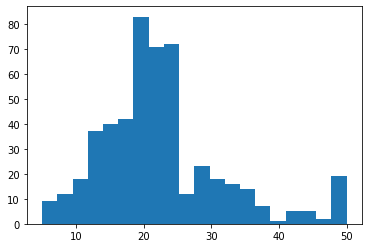

In [2]:
# 读取数据
boston_X,boston_y=load_boston(return_X_y=True)
print("boston_X.shape:",boston_X.shape)
plt.figure()
plt.hist(boston_y,bins=20)
plt.show()

In [8]:
# 数据标准化处理
ss=StandardScaler(with_mean=True,with_std=True)
boston_Xs=ss.fit_transform(boston_X)
# 将数据集预处理为可以使用pytorch进行批量训练的形式
# 训练集x转化为张量
train_xt=torch.from_numpy(boston_Xs.astype(np.float32))
# 训练集y转化为张量
trian_yt=torch.from_numpy(boston_y.astype(np.float32))
# 将训练集转化为张量，使用TensorDataset将x和y整合到一起
trian_data=Data.TensorDataset(train_xt,trian_yt)
# 定义一个数据加载器，将训练数据集进行批量处理
train_loader=Data.DataLoader(
    dataset=trian_data, # 使用的数据集
    batch_size=128,# 批处理的样本大小
    shuffle=True,# 每次迭代之前打乱数据
    num_workers=1# 使用两个进程
)